<a href="https://colab.research.google.com/github/nadeem53/Titanic_data/blob/main/data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRAINING DATA PRE-PROCESSING**
First we will clean and transform the training data into a useable format for analysis and modeling.

-Assumtions about data shape

-Incorrect data types

-Outliers or errors

-Missing values

-Catagorical Values

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
titanic_data = pd.read_csv("/content/titanic_dataset.csv")

In [3]:
# Data Shape
print('Train data:', titanic_data.shape)

Train data: (891, 12)


In [4]:
# view first five rows of data
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Data info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# count te missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**The above method shows there is three features that have missing values (Age, Cabin, Embarked).**

# Missing Data
**A heatmap will help better visualize what features are missing the most information.**

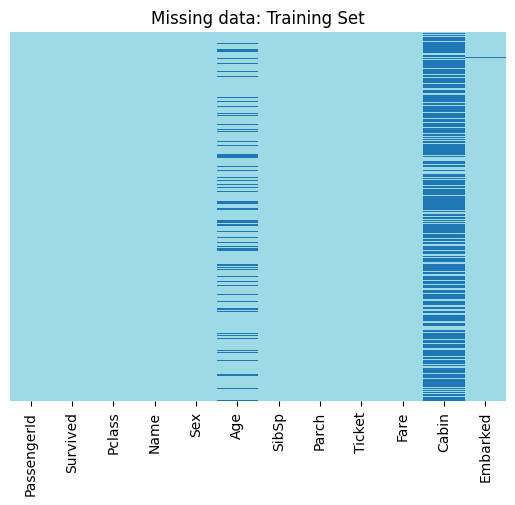

In [7]:
sns.heatmap(titanic_data.isnull(),yticklabels= False, cbar= False, cmap = 'tab20_r')
plt.title('Missing data: Training Set')
plt.show()

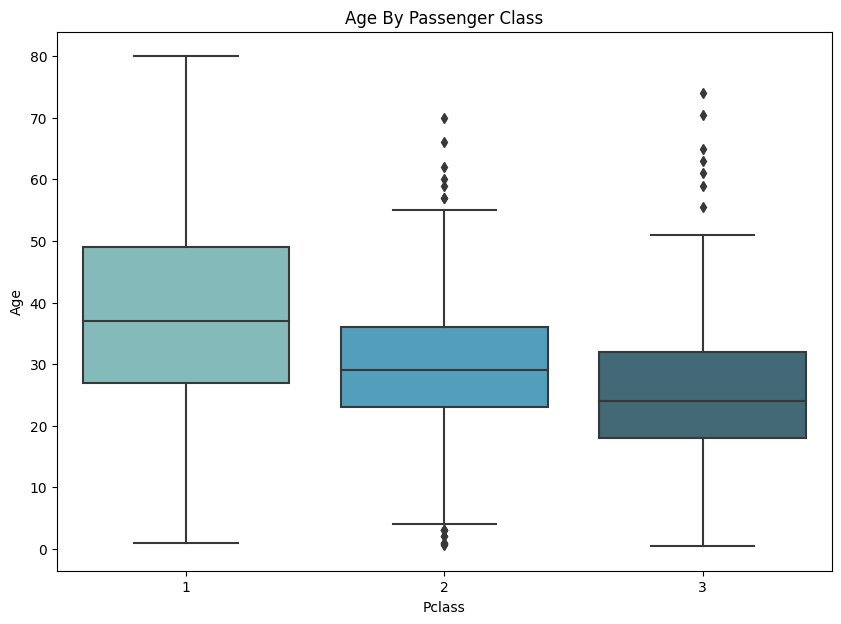

In [8]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_data, palette = 'GnBu_d').set_title('Age By Passenger Class')
plt.show()

**So we are filling the missing values in Age column.**

In [9]:
# imputation function
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37

    elif Pclass == 2:
      return 29

    else:
      return 24

  else:
    return Age


# apply the function to the age column
titanic_data['Age']= titanic_data[['Age','Pclass']].apply(impute_age, axis = 1)




**The Cabin feature have much many missing values. So we will drop this feature.**

In [10]:
# drop Cabin column
titanic_data.drop('Cabin', axis = 1, inplace = True)

In [11]:
#remove rows with missing data
titanic_data.dropna(inplace = True)

In [12]:
# Remove unnecessary columns
titanic_data.drop(['Name','Ticket'], axis = 1, inplace = True)

In [13]:
# convert objects to category datatypes
objcat =['Sex','Embarked']
for colname in objcat:
  titanic_data[colname] = titanic_data[colname].astype('category')

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [14]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# drop passenger id column
titanic_data.drop('PassengerId', inplace = True, axis = 1)

In [16]:
# shape of data
titanic_data.shape

(889, 8)

In [17]:
titanic_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [18]:
# convert categorical variable into dummy
Sex = pd.get_dummies(titanic_data['Sex'], drop_first = True)

Embarked = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

In [19]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
# add new dummy column to dataframe
titanic_data = pd.concat([titanic_data, Sex, Embarked], axis = 1)

In [21]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [22]:
# drop unnecessary columns
titanic_data.drop(['Sex','Embarked'], axis = 1, inplace = True)

In [23]:
print('Train data shape ', titanic_data.shape)

Train data shape  (889, 9)


In [24]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
titanic_data.shape

(889, 9)

**Now the titanic data is perfect for machine learning algorithm.**

**-all the data is numeric**

**-everything is cocatenated together**

In [34]:
x = titanic_data.drop('Survived', axis = 1)
y = titanic_data['Survived']
# use x and y variable to split the training data into train and test set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state = 101)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train)
y_pred = gbm.predict(x_test)

In [56]:
from sklearn.linear_model import  LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
#predict
y_pred_lreg = logreg.predict(x_test)
print(y_pred_lreg)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]


In [58]:
#score it
from sklearn.metrics import classification_report, accuracy_score
print('Classification Model')
#Accuracy
print('__'*40)
logreg_accuracy = round(accuracy_score(y_test,y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy, '%')

Classification Model
________________________________________________________________________________
Accuracy 82.02 %
